# Лабораторная работа №5
## Ансамбли моделей машинного обучения

## Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие ансамблевые модели:
    - одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
    - одну из моделей группы бустинга;
    - одну из моделей группы стекинга.
5. (+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:
    - Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
    - Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.
6. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz
from sklearn import tree
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("fruit_data_with_colors.txt", sep = '\s+')

In [4]:
#Первые 5 записей датасета
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
#Проверка наличия пустых значений
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [6]:
#Размер исходного датасета
data.shape

(59, 7)

In [8]:
#Проверка типов
data.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [9]:
#Удаление ненужных столбцов
data = data.drop(columns=["fruit_name", "fruit_subtype"], axis=1)

<AxesSubplot:>

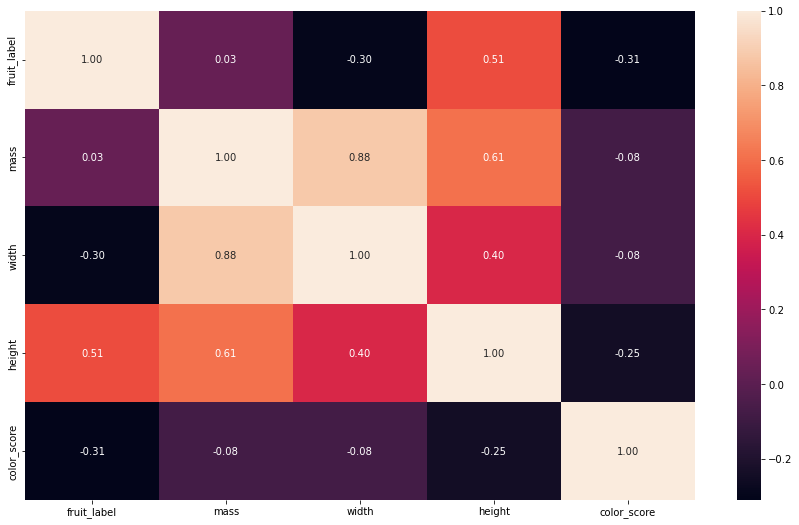

In [10]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [11]:
xArray = data.drop("fruit_label", axis=1)
yArray = data["fruit_label"]

In [12]:
#Разделяем выборку для обучения модели
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

## Случайный лес

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
RForest = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
RForest.fit(trainX, trainY)

D:\Programs\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Programs\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)

In [15]:
estimateRF = balanced_accuracy_score(testY, RForest.predict(testX))
estimateRF

1.0

In [16]:
nums = range(100,1000,100)
RForestarr = list()
for i in range(100,1000,100):
    RForest = RandomForestClassifier(n_estimators=i, oob_score=True, random_state=10)
    RForest.fit(trainX, trainY)
    RForestarr.append(balanced_accuracy_score(testY, RForest.predict(testX)))

In [17]:
RForestarr

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

## Boosting

In [18]:
GB = GradientBoostingClassifier(random_state=1)
GB.fit(trainX, trainY)

GradientBoostingClassifier(random_state=1)

In [19]:
balanced_accuracy_score(testY, GB.predict(testX))

1.0

## Stacking

In [20]:
base_learners = [
                 ('RF', RandomForestClassifier(n_estimators=10, random_state=1)),
                 ('GB', GradientBoostingClassifier(n_estimators=10, random_state=1))             
                ]

SC = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
SC.fit(trainX, trainY)

D:\Programs\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Programs\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=1)),
                               ('GB',
                                GradientBoostingClassifier(n_estimators=10,
                                                           random_state=1))],
                   final_estimator=LogisticRegression())

In [21]:
balanced_accuracy_score(testY, SC.predict(testX))

1.0